<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 500
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_circles(n_samples = n_pts, random_state= 123, noise = 0.1, factor = 0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(500,1))

In [0]:
# Boolean check grab me all the x coordinates that correspond to labels of zero
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

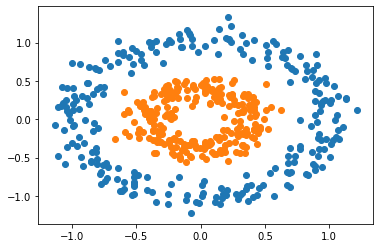

In [5]:
scatter_plot()

### **Model Setup**

In [0]:
class Model(nn.Module):
  def __init__(self,input_size, h1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, h1)
    self.linear2 = nn.Linear(h1, output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [7]:
torch.manual_seed(2)
# Model with 2 nodes in the input layer, 4 in the hidden layer and 1 in the output layer
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


## **Model Training**

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  # print('epochs:', i, 'loss:', loss.item())

  losses.append(loss.item())
  # Clear the gradient of all optimized grad
  optimizer.zero_grad()
  # Calculates the gradient
  loss.backward()
  # Perform a single optimization step for the optimizer
  optimizer.step()

Text(0, 0.5, 'loss')

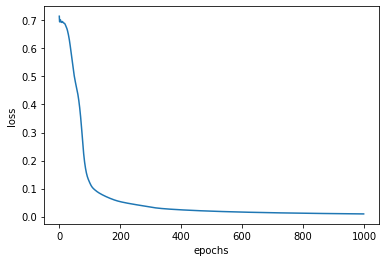

In [10]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

## **Model Testing**

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:,0]),max(X[:,0]))
  y_span = np.linspace(min(X[:,1]),max(X[:,1]))
  xx, yy = np.meshgrid(x_span,y_span)
  grid = torch.tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_function = model.forward(grid)
  z = pred_function.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

In [12]:
plot_decision_boundary(X, y_data.float())
scatter_plot()

RuntimeError: ignored

Prediction is 1


RuntimeError: ignored

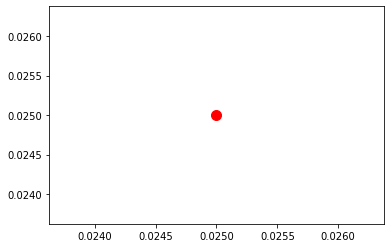

In [14]:
x = 0.025
y = 0.025
point = torch.tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker='o', markersize=10, color ='red')
print('Prediction is', prediction)
plot_decision_boundary(X,y)